# SyriaTel Customer Churn Prediction

## BUSINESS UNDERSTANDING
Syriatel is a major telecommunications company in Syria. It offers a range of services, including mobile and fixed-line telephony, internet access, and data services. The company has a significant market share in Syria and plays a vital role in connecting people and businesses across the country.


However, due to the ongoing conflict in Syria, Syriatel's operations have been significantly impacted. The company has faced challenges such as infrastructure damage, power outages, and security threats. Despite these difficulties, Syriatel has continued to provide essential communication services to the Syrian people


Customer churn is a significant concern for telecommunications companies. It refers to the loss of customers over a specific period. This can be a costly problem, as acquiring new customers is often more expensive than retaining existing one

### PROBLEM STATEMENT

SyriaTel is a telecommunications company in Syria that aims to utize customer data to uncover patterns and predict the probability of customer churn, enabling the company to take steps to retain high_value customers and minimize value losses.


### OBJECTIVES

#### Main Objective
- Find a machine learning model for correct classification of Churn and non churn customers.

#### Secondary objectives
1. To analyze customer behavior patterns and identify key factors influencing churn decisions.
2. To identiwhich of the key factors that affect churn need to be given more attention or priority in order to reduce customer churn as soon as Possible. up.
3. To evaluate the effectiveness of retention strategies and measure the impact on customer churn rate

### Metrics of success

Based on previous studies and research, the following are the measures that evaluate the success of models.
- Accuracy:80%
        total number of True positives(correctly identified instances)
  
- Precision:50%
        measures how predictive the model is in regard s to the number of true positives against false positives
  
- REcall:75%
        The ability of the model to identify churners correctly
  
- F1-Score: between 0.55 and o.65
        measures the accuracy of the predictive model's performance
  
- Area Under the Curve (AUC): The higher the AUC the more accurate the perfomance




## DATA UNDERSTANDING

The csv file used for this project was downloaded from Kaggle.  
It is named as "bigml.csv" 

We'll start by importing the Libraries that we need. I,ll also be adding other libraries as we go for easier understanding.

In [105]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

Since the fuctions have been written in another script known as functions, we'll need to import the classes to the notebook for us to use it.

From there I'll go on and check 

In [106]:
#importing the data_understanding class from the functions script file
from functions import data_understanding as du

# Loading the "bigml.csv" file that will be used in this project
data = du("bigml.csv") 
data.first_rows() # This views the first 5 rows of the data.


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [107]:
#checking the shape of the dataframe
data.data_shape()

(3333, 21)

In [108]:
# checking the info of the dataframe
data.data_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [109]:
#checking the statistical summary of the data
data.data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The "bigml.csv" dataset has the following attributes:
 - It has 3333 rows and 21 columns
   
Here is a further explanation of the columns that we have:
1. state: The state where the customer resides.
2. account length: The number of months the customer has been with the telecommunications company.
3. area code: The area code of the customer's phone number.
4. phone number: The customer's phone number.
5. international plan: Whether the customer has an international plan.
6. voice mail plan: Whether the customer has a voicemail plan.
7. number vmail messages: The number of voicemail messages the customer has.
8. total day minutes: The total number of minutes1 used during the day.   
9. total day calls: The total number of calls made during the day.
10. total day charge: The total charge for day time usage.
11. total eve minutes: The total number of minutes used during the evening.
12. total eve calls: The total number of calls made during the evening.
13. total eve charge: The total charge for evening time usage.
14. total night minutes: The total number of minutes used during the night.
15. total night calls: The total number of calls made during the night.
16. total night charge: The total charge for night time usage.
17. total intl minutes: The total number of minutes used for international calls.
18. total intl calls: The total number of international calls made.
19. total intl charge: The total charge for international calls.
20. customer service calls: The number of calls made to customer service.
21. churn: Whether the customer has churned (left the company) or not.

We have four data types.
- Boolean, used in one column
- Integer, use in 8 columns
- Float, used in 8 columns
- object, used in 4 columns.
  
This shows that most of the columns have numerical data.

## DATA PREPARATION - Data Cleaning

In [110]:
# Importing the data_cleaning class from functions script file
from functions import data_cleaning as dc

#passing the loaded data from data_understanding class to data_cleaning class.
data_for_cleaning = data.data

cleaned_data = dc(data_for_cleaning)

In [111]:
#checking for missing values
cleaned_data.missing_values()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no columns with missing values. Therefore we don't have to worry about handling any

In [112]:
#checking for duplicates
cleaned_data.duplicates()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


There are no duplicate values in any of the 21 columns

In [113]:
cleaned_data.null_values()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [114]:
cleaned_data.outliers()

[('account length', 18),
 ('area code', 0),
 ('number vmail messages', 1),
 ('total day minutes', 25),
 ('total day calls', 23),
 ('total day charge', 25),
 ('total eve minutes', 24),
 ('total eve calls', 20),
 ('total eve charge', 24),
 ('total night minutes', 30),
 ('total night calls', 22),
 ('total night charge', 30),
 ('total intl minutes', 46),
 ('total intl calls', 78),
 ('total intl charge', 49),
 ('customer service calls', 267)]

In [115]:
cleaned_data.drop_columns(["area code", "phone number"])

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


## DATA ANALYSIS - EDA

### Univariate Analysis
Analysing one variable at a time to understand it's distribution or key characteristics

In [116]:
#Importing our data analysis class from our functions script file with an alias  name "da"
from functions import data_analysis as da
analysis = da(cleaned_data.data)

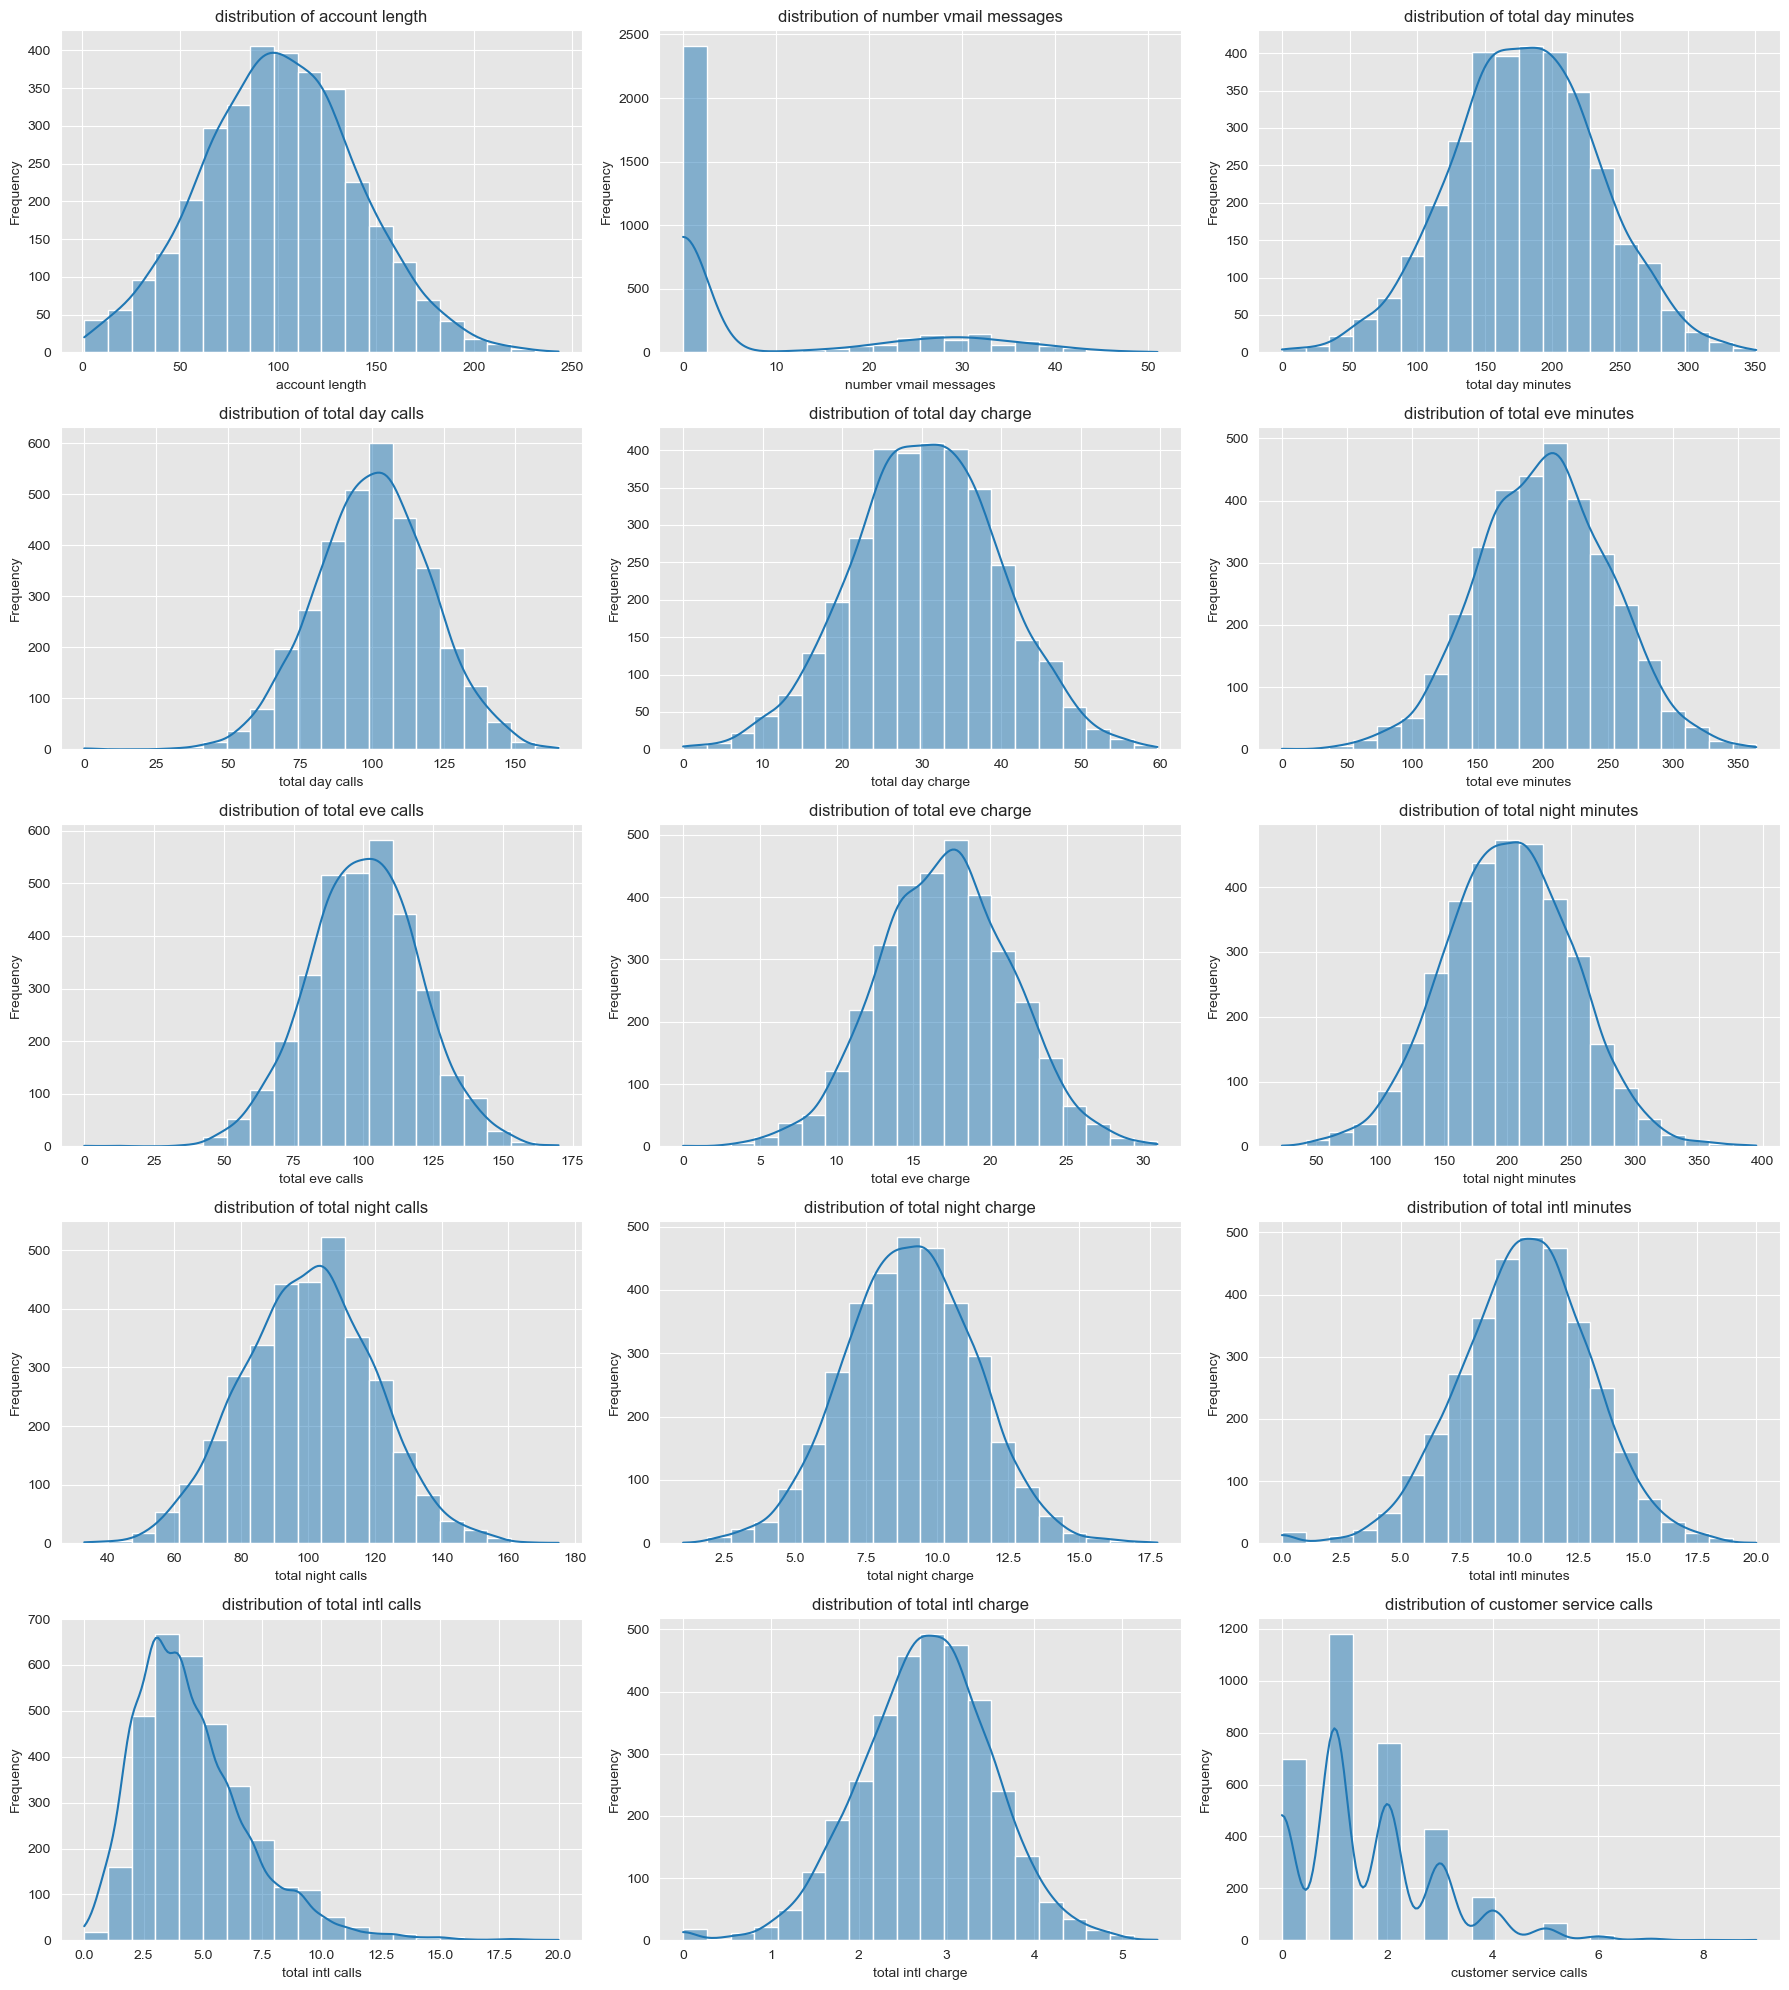

In [117]:
#plotting the distribution of features.
analysis.feature_distributions()

Thefaeture distribution plot above is used to explore the distribution of individual features(variables), which are also the columns, in a dataset.
From the plots;
- we can tell whether a variable is normally distributed, skewed or has any other patterns by looking at the shape of the distribution
- we can tell the range of values and get minimum, maximum and spread of values within the feature
- we can tell how often different values appear in the dataset
- we can tell if a variable has outliers by looking at values that are  unusually high or low compared to the rest of the data
  

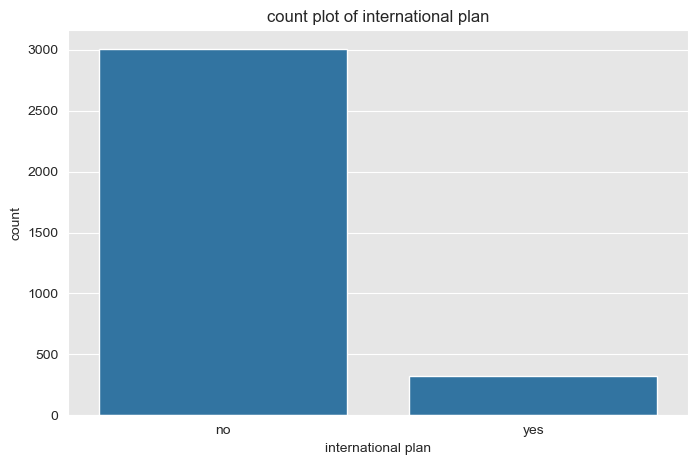

In [118]:
#count plot of International plan column
analysis.uni_plots(column = "international plan", plot_type = "count plot")

Observations:
From the above plot, we can see that there less international plans made compare to the total plan. It is around 470.

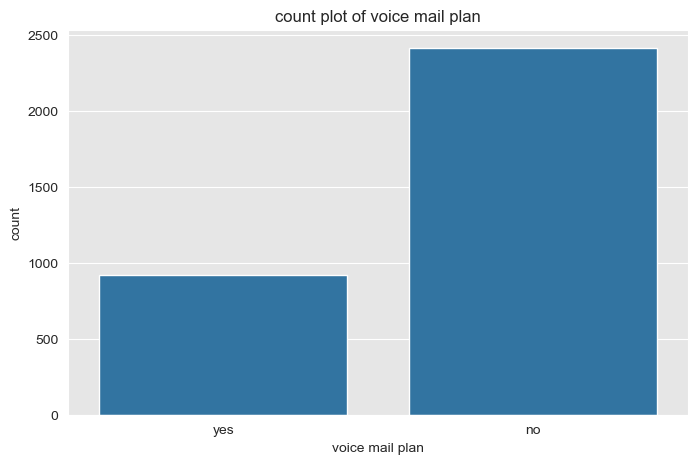

In [119]:
#count plot of voicemail plan
analysis.uni_plots(column = "voice mail plan",  plot_type = "count plot")

Observations:
From the total count, there are around 900 voicemail plans

### Bivariate Analysis
Analysing the relationship between two variables to explore potential correlations or dependencies 

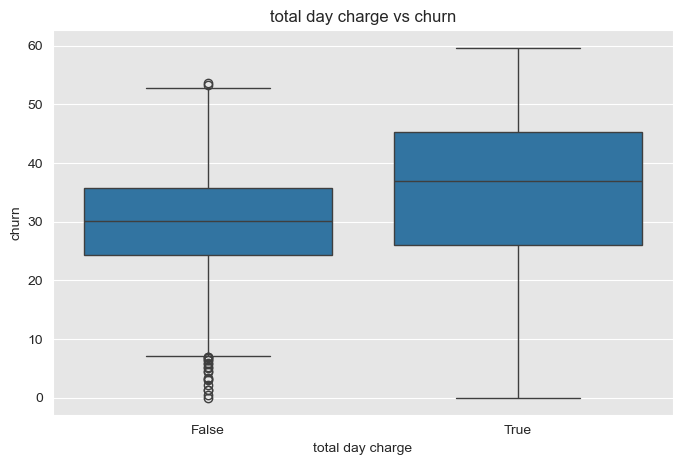

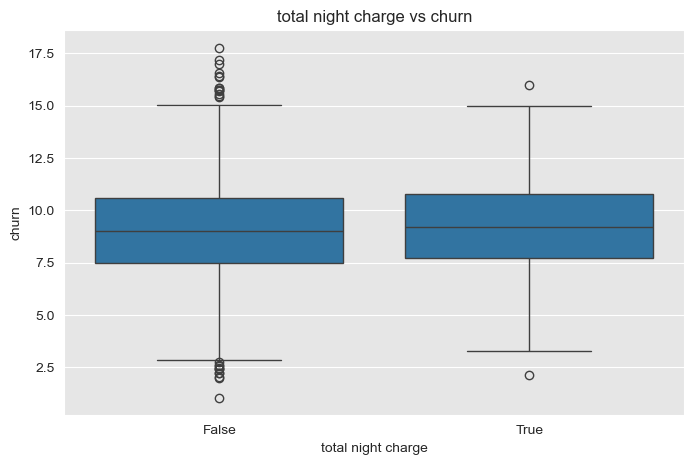

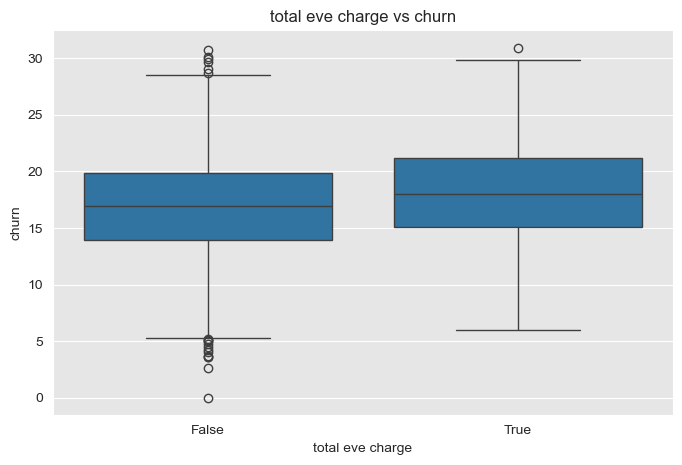

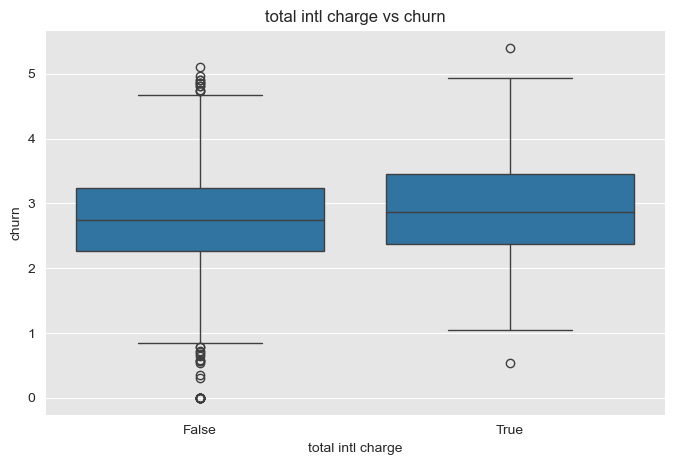

In [120]:
#Analysing total day minutes vs churn
analysis.biv_plots(column = "total day charge", target = "churn")
analysis.biv_plots(column = "total night charge", target = "churn")
analysis.biv_plots(column = "total eve charge", target = "churn")
analysis.biv_plots(column = "total intl charge", target = "churn")

observations:

-The box of the churners is wider than that of the non-churners.
This means that their usage patterns vary significantly.

-The median of churners is higher compared to non-churners.
This shows that customers who use more daytime minutes are likely to churn

Observations:

- The box of the churners is the same size as that of the non-churners. This means that their usage patterns are the same.
- 
-The median of churners islightly s higher compared to non-churners. This shows that customers who use more daytime minutes are likely to churn

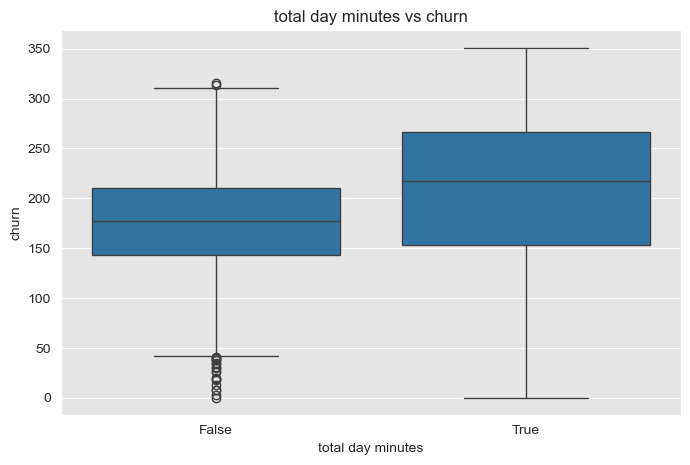

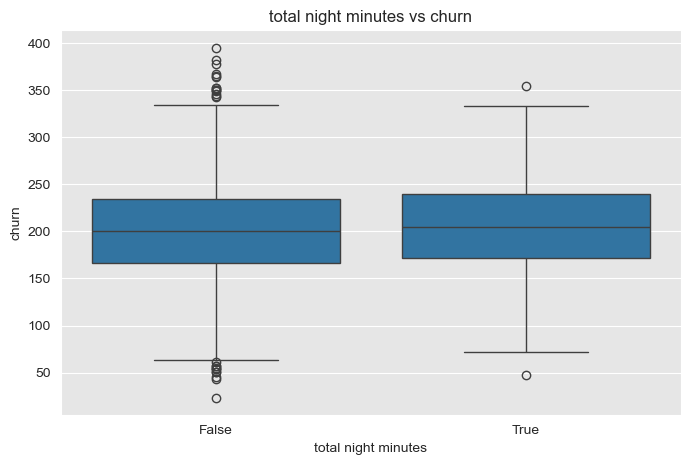

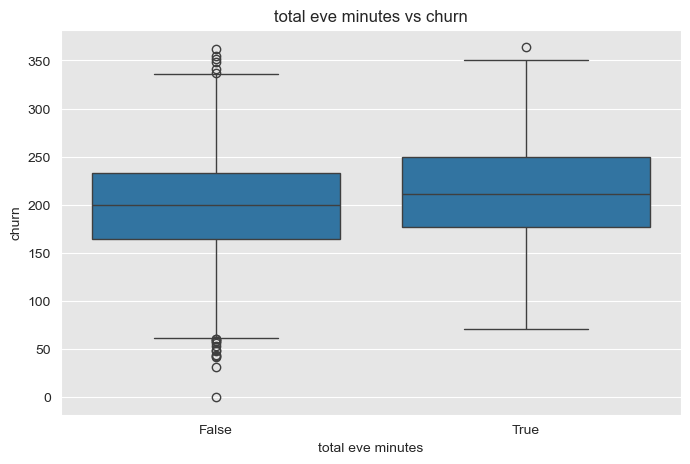

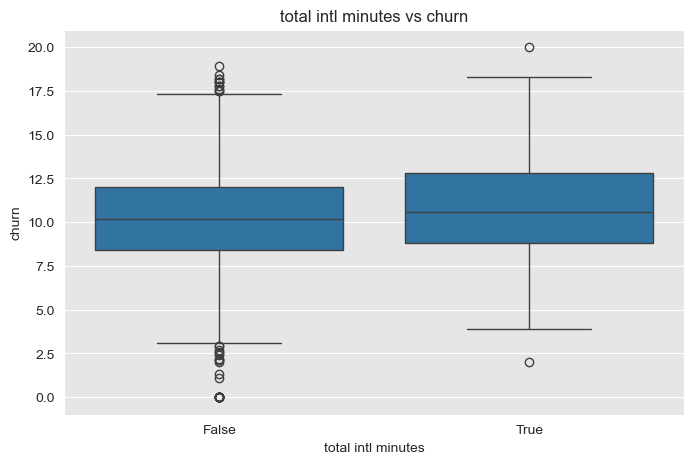

In [121]:
#Analysing total minutes vs churn
analysis.biv_plots(column = "total day minutes", target = "churn")
analysis.biv_plots(column = "total night minutes", target = "churn")
analysis.biv_plots(column = "total eve minutes", target = "churn")
analysis.biv_plots(column = "total intl minutes", target = "churn")

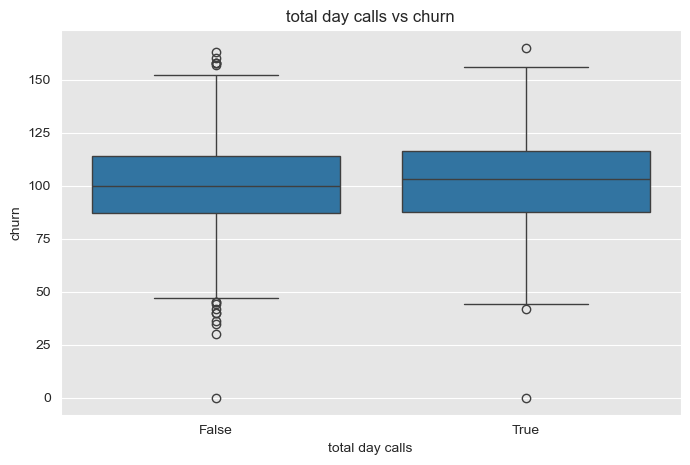

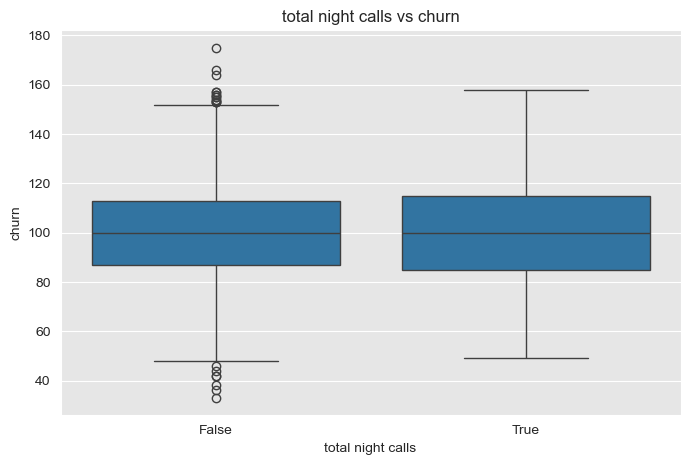

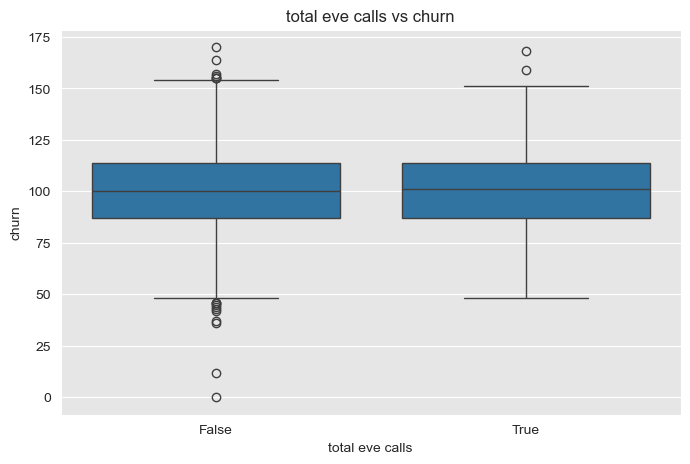

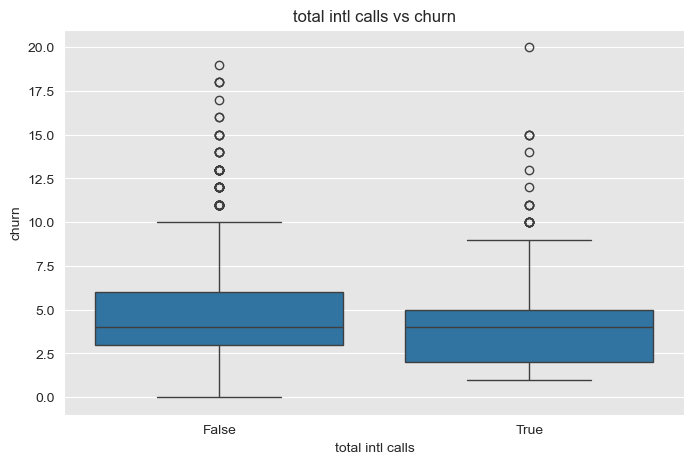

In [122]:
#Analysing total day minutes vs churn
analysis.biv_plots(column = "total day calls", target = "churn")
analysis.biv_plots(column = "total night calls", target = "churn")
analysis.biv_plots(column = "total eve calls", target = "churn")
analysis.biv_plots(column = "total intl calls", target = "churn")

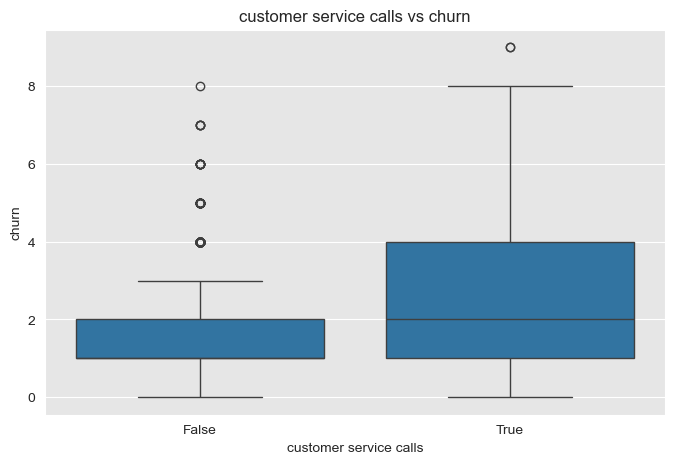

In [123]:
analysis.biv_plots(column = "customer service calls", target = "churn")

- The box of the churners is wider than that of the non-churners. This means that their usage patterns vary significantly.
- The e median of churners is higher compared to non-churners. This shows that customers whmake more customer service callses a morere likely to churn

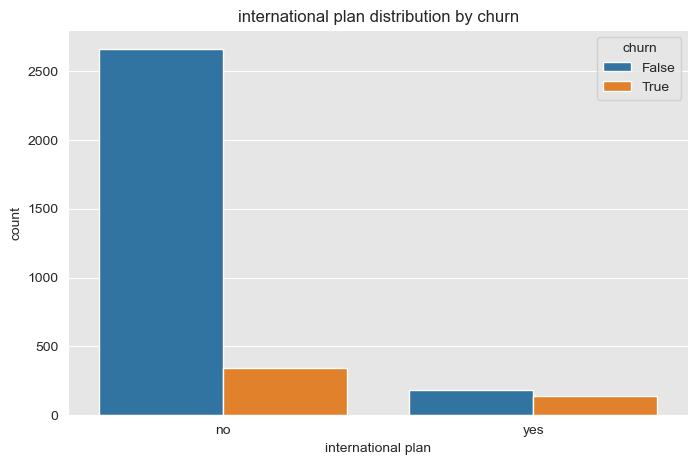

In [124]:
#Analysing the distribution of international plan by churn
analysis.biv_plots(column = "international plan", target = "churn")

Observations:
- For those that use international plan, there are more non-churners than churners.
- For those that don't use international plan, there are also more non-churners compared to churnes

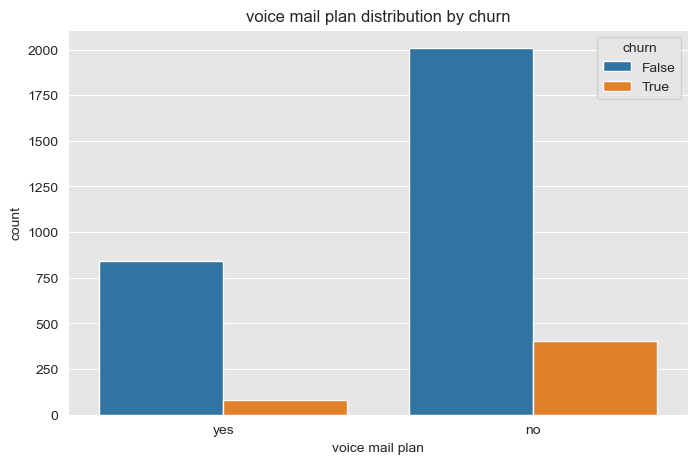

In [125]:
#Analysing the distribution of voicemail plan by churn
analysis.biv_plots(column = "voice mail plan", target = "churn")

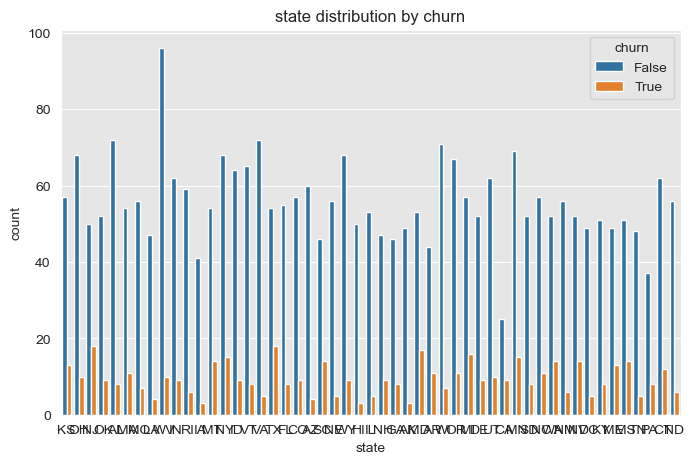

In [126]:
#Analysing the distribution of voicemail plan by churn
analysis.biv_plots(column = "state", target = "churn")

Observations:

- There are more people that don't use voicemail plan than those who use voicemail plan
- For those that use voicemail plan, there are more non-churners than churners.- 
For those that don't usevoicemaill plan, there are also more non-churners compared to churnes

### Multivariate Analysis
Analyses three or more variables simuteneously to uncover deeper relationships

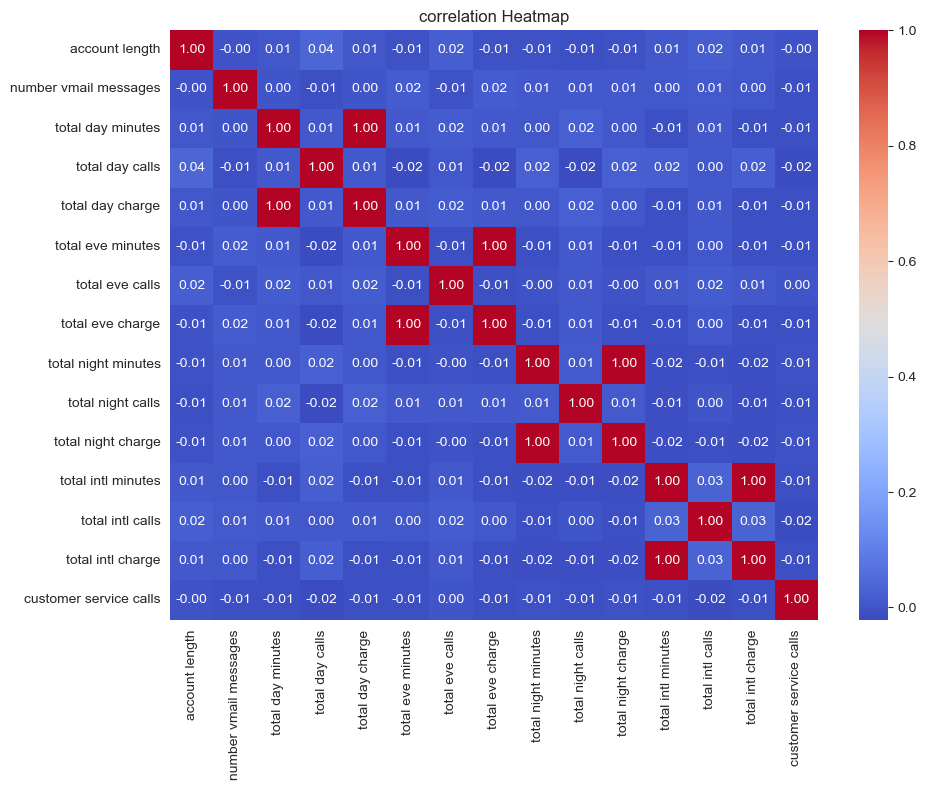

In [127]:
#Analysing the correlation between numerical variables in the dataset. 
numeric_columns = analysis.data.select_dtypes(include=["float64", "int64"]).columns
analysis.multiv_plots(columns = numeric_columns, target = "churn")

The above plot is a plot showin correlation between the numeric columns. its shows that there is multicoleniarity wethin the dataset.
The multicollinearity is there because total day charge isequal to total day minutes, total night charge is equal to total night minutes, total international charge is equal to total international minutes.

## MODELING AND EVALUATING

### Data Preprocessing

Before modelling, I'm going to remove the multicollinearity first by dropping the minuites columns.

In [128]:
#creating a dataset (df) that i'm going to use for modelling.

df = analysis.drop_columns(["total day minutes", "total night minutes", "total intl minutes", "total eve minutes"])
df

,state,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,OH,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,NJ,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,OH,84,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,OK,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,no,yes,36,77,26.55,126,18.32,83,12.56,6,2.67,2,False
3329,WV,68,no,no,0,57,39.29,55,13.04,123,8.61,4,2.59,3,False
3330,RI,28,no,no,0,109,30.74,58,24.55,91,8.64,6,3.81,2,False
3331,CT,184,yes,no,0,105,36.35,84,13.57,137,6.26,10,1.35,2,False


I'm also going to drop state and account length columns because I'll not be using them 

In [129]:
#dropping state and account length columns.
df = df.drop(columns = ["state", "account length"])


In [130]:
#checking the remaining columns.
df.columns

Index(['international plan', 'voice mail plan', 'number vmail messages',
       'total day calls', 'total day charge', 'total eve calls',
       'total eve charge', 'total night calls', 'total night charge',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

### Label Encoding
Next, i'm going to do label encoding on the "international plan", "voice mail plan" and "churn" columns.

In [131]:
#checking for the value counts of the above columns.
print (df["international plan"].value_counts(), "\n") 
print (df["voice mail plan"].value_counts(), "\n")
print (df["churn"].value_counts())

international plan
no     3010
yes     323
Name: count, dtype: int64 

voice mail plan
no     2411
yes     922
Name: count, dtype: int64 

churn
False    2850
True      483
Name: count, dtype: int64


In [132]:
#Mapping the columns.
df["international plan"] = df["international plan"].map({"yes": 1, "no": 0})
df["voice mail plan"] = df["voice mail plan"].map({"yes": 1, "no": 0})
df["churn"] = df["churn"].map({True: 1, False: 0})

In [133]:
#confirming that the changes have been made
print (df["international plan"].value_counts(), "\n") 
print (df["voice mail plan"].value_counts(), "\n")
print (df["churn"].value_counts())

international plan
0    3010
1     323
Name: count, dtype: int64 

voice mail plan
0    2411
1     922
Name: count, dtype: int64 

churn
0    2850
1     483
Name: count, dtype: int64


### Modeling

#### Decision Trees

In [134]:
x = df.drop("churn", axis = 1)
y = df ["churn"]

#split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)


In [135]:
#Building and training baseline model which is a simple tree with default parameters
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 42)

baseline_model = dtc.fit(x_train, y_train)
baseline_model


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [136]:
#predicting the test data
y_pred = dtc.predict(x_test)

In [137]:
#checking the AUC of my predictions
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

0.8416016513312109

After building the baseline model, I will be evaluating using the metrics of success

In [138]:
#Evaluating the baseline model

print ("Baseline Model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred)}")
print (f"recall: {metrics.recall_score(y_test, y_pred)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred)}")

Baseline Model Metrics:
Accuracy: 0.9175412293853074
Precision: 0.7254901960784313
recall: 0.7326732673267327
f1_score: 0.729064039408867


<bound method BaseEstimator.get_params of DecisionTreeClassifier(criterion='entropy', random_state=42)>

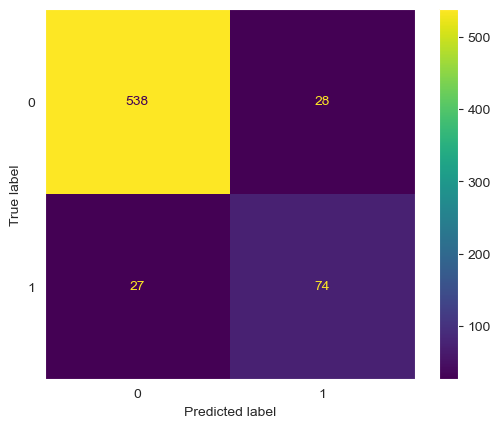

In [139]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.grid(False);

#Getting the parameters of the baseline model
baseline_model.get_params

### Pruning the decision tree baseline model
We'll be looking at the following:
- Max_depth
- min_sample_leaves
- min_sample_splits
- maximum features

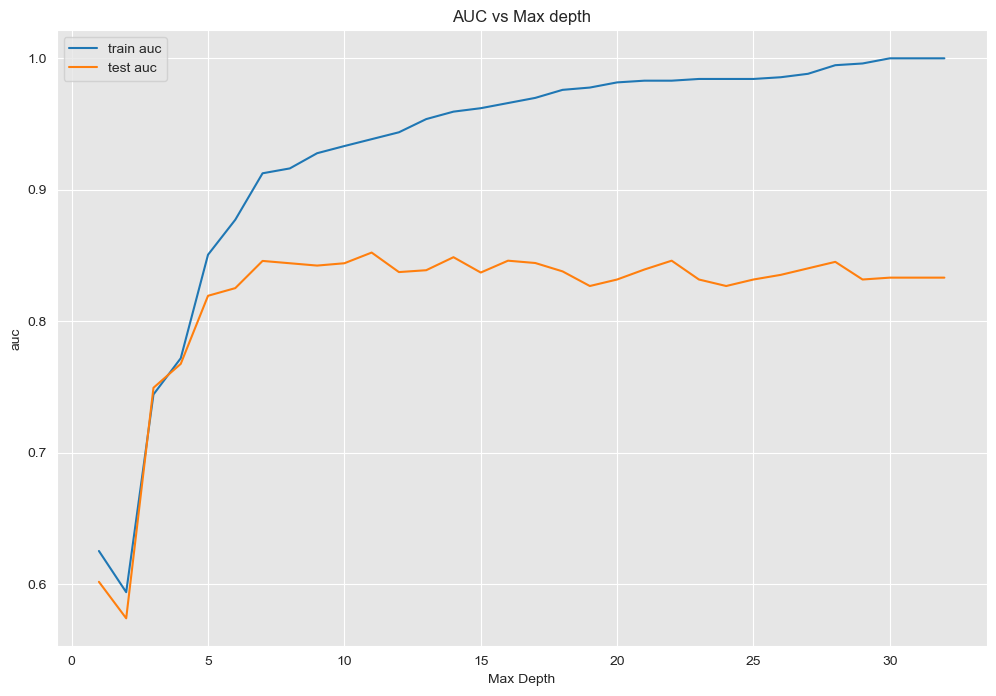

In [140]:
#identify the tree depth of our baseline model
max_depth = np.linspace (1,32,32,dtype = int)

auc_train =[]
auc_test =[]

for depth in max_depth:
    dtc = DecisionTreeClassifier(criterion ="entropy", random_state = 1, max_depth = depth)
    dtc.fit(x_train,y_train)
    y_test_pred = dtc.predict(x_test)
    y_train_pred = dtc.predict(x_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = metrics.roc_curve(y_train,y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = metrics.roc_curve(y_test,y_test_pred)
    roc_auc_train = metrics.auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = metrics.auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(max_depth,auc_train, label = "train auc")
ax.plot(max_depth,auc_test, label = "test auc")
ax.set_xlabel("Max Depth")
ax.set_ylabel("auc")
ax.set_title("AUC vs Max depth")
ax.legend();



Maximum depth isof the test curve is 7

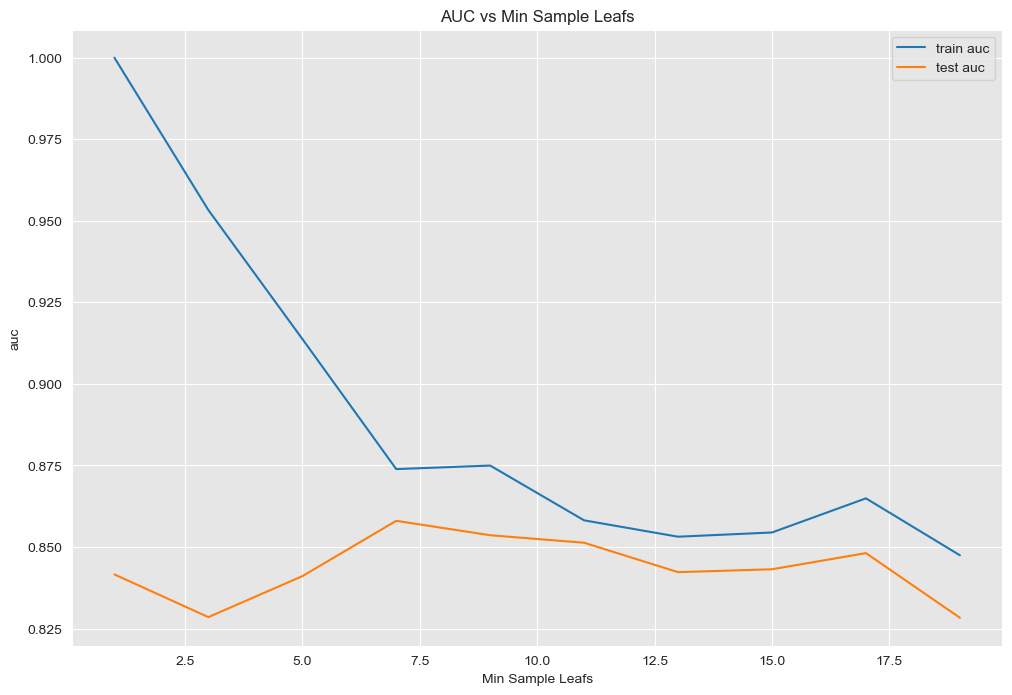

In [141]:
# Calculate minimum sample leafs

min_samples_leafs = range(1, 20, 2)

auc_train =[]
auc_test =[]

for leaf in min_samples_leafs:
    dtc = DecisionTreeClassifier(criterion ="entropy", random_state = 42, min_samples_leaf = leaf)
    dtc.fit(x_train,y_train)
    y_test_pred = dtc.predict(x_test)
    y_train_pred = dtc.predict(x_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = metrics.roc_curve(y_train,y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = metrics.roc_curve(y_test,y_test_pred)
    roc_auc_train = metrics.auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = metrics.auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(min_samples_leafs,auc_train, label = "train auc")
ax.plot(min_samples_leafs,auc_test, label = "test auc")
ax.set_xlabel("Min Sample Leafs")
ax.set_ylabel("auc")
ax.set_title("AUC vs Min Sample Leafs")
ax.legend();

The optimal value is 7

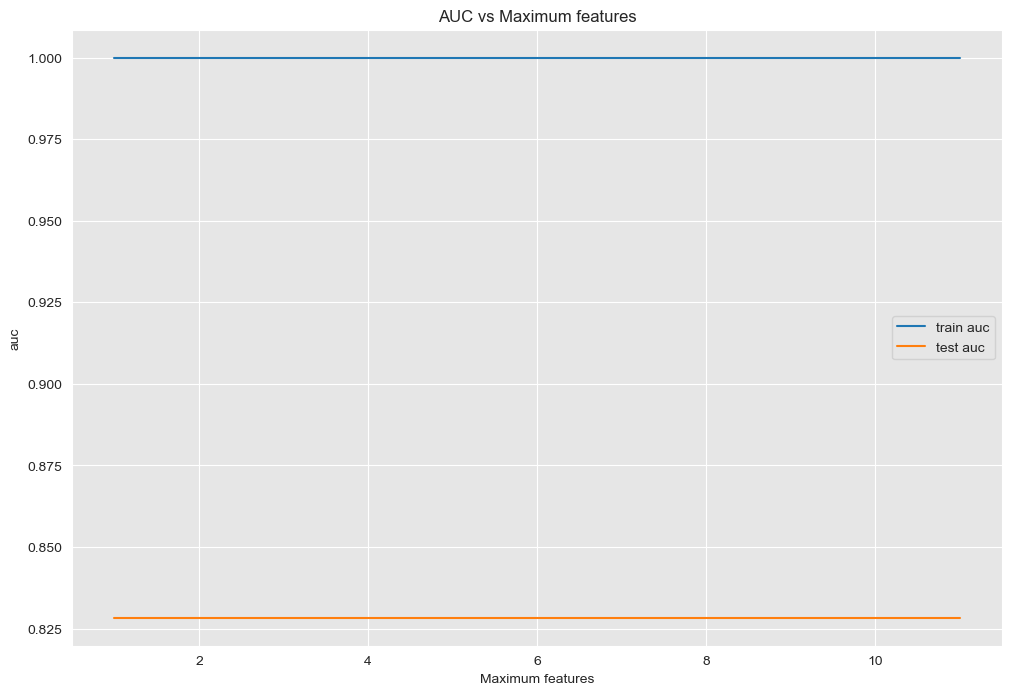

In [142]:
# Find the best value for optimal maximum feature size

max_features = range(1, 12, 2)

auc_train =[]
auc_test =[]

for feature in max_features:
    dtc = DecisionTreeClassifier(criterion ="entropy", random_state = 42, max_features = feature)
    dtc.fit(x_train,y_train)
    y__test_pred = dtc.predict(x_test)
    y_train_pred = dtc.predict(x_train)
    false_positive_rate_train, true_positive_rate_train, thresholds_train = metrics.roc_curve(y_train,y_train_pred)
    false_positive_rate_test, true_positive_rate_test, thresholds_test = metrics.roc_curve(y_test,y_test_pred)
    roc_auc_train = metrics.auc(false_positive_rate_train,true_positive_rate_train)
    roc_auc_test = metrics.auc(false_positive_rate_test,true_positive_rate_test)
    auc_train.append(roc_auc_train)
    auc_test.append(roc_auc_test)

fig, ax = plt.subplots(figsize =(12,8))

ax.plot(max_features,auc_train, label = "train auc")
ax.plot(max_features,auc_test, label = "test auc")
ax.set_xlabel("Maximum features")
ax.set_ylabel("auc")
ax.set_title("AUC vs Maximum features")
ax.legend();

### Pruned model

In [143]:
pruned_decision_tree_model = DecisionTreeClassifier(criterion ="entropy", random_state = 42, max_depth = 7, min_samples_leaf = 7 )
pruned_decision_tree_model.fit(x_train,y_train)

y_pred_pruned = pruned_decision_tree_model.predict(x_test)

In [144]:
#Evaluation metrics for pruned model
print ("Pruned model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred_pruned)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred_pruned)}")
print (f"recall: {metrics.recall_score(y_test, y_pred_pruned)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred_pruned)}")

Pruned model Metrics:
Accuracy: 0.9355322338830585
Precision: 0.8295454545454546
recall: 0.7227722772277227
f1_score: 0.7724867724867724


In [145]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,y_pred_pruned)
roc_auc = metrics.auc(false_positive_rate,true_positive_rate)
roc_auc

0.8481352552216352

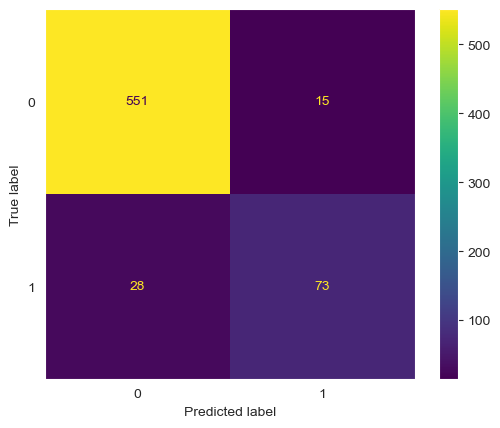

In [146]:
#confusion matrix for the pruned model
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_pruned)

display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.grid(False);

#### Logistic Regression

we'll use the x and y variables that we used for decision tree modelling, so we'll just confirm if they are correct

In [147]:
print(f"{x} are the x variables")
print (f"{y} is the target variable")

      international plan  voice mail plan  number vmail messages  \
0                      0                1                     25   
1                      0                1                     26   
2                      0                0                      0   
3                      1                0                      0   
4                      1                0                      0   
...                  ...              ...                    ...   
3328                   0                1                     36   
3329                   0                0                      0   
3330                   0                0                      0   
3331                   1                0                      0   
3332                   0                1                     25   

      total day calls  total day charge  total eve calls  total eve charge  \
0                 110             45.07               99             16.78   
1                 123      

Now that we have confirmed all the variables are correct, we can go on with the next step which is checking for imbalance in the target variable.

In [148]:
#checking for imbalance in the target variable
#value counts of our target variable 
print(y.value_counts(), "\n")
print(y.value_counts(normalize = True))

churn
0    2850
1     483
Name: count, dtype: int64 

churn
0    0.855086
1    0.144914
Name: proportion, dtype: float64


Next i'll perform a rain_test split to split the data into training and testing sets

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

# Check the sizes of the datasets
print(f"Training set size: {x_train.shape}")
print(f"Testing set size: {x_test.shape}")

Training set size: (2333, 12)
Testing set size: (1000, 12)


we'll scale the features to reduce convergence.

In [150]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Building and evaluating Baseline model

In [151]:
baseline_model = LogisticRegression(random_state = 42)

#fitting the model
baseline_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

Plotting ROC and displaying AUC to evaluate the model

metrics.AUC: 0.83050321906798


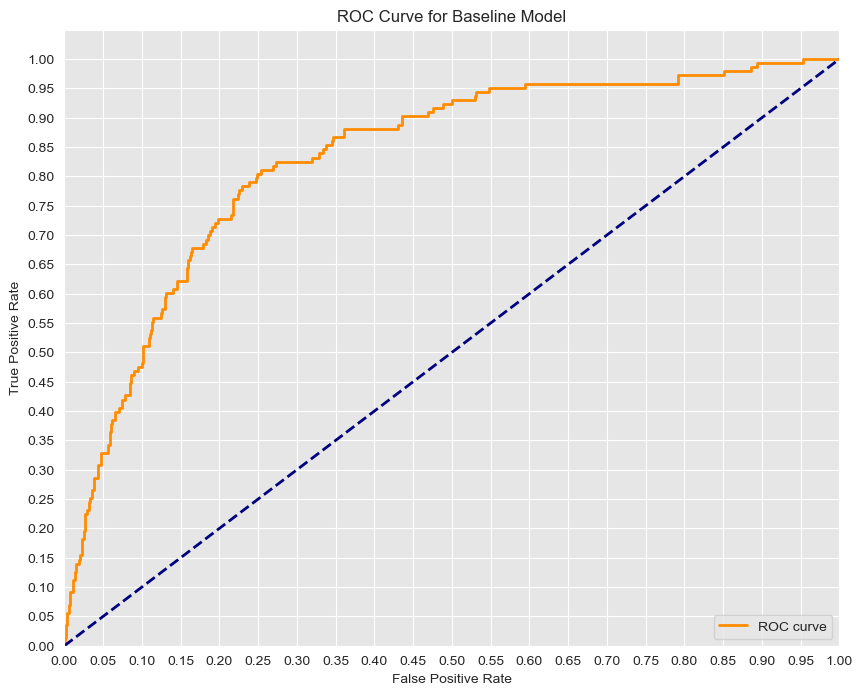

In [152]:
# Probability scores for test set
y_score = baseline_model.fit(x_train,y_train).decision_function(x_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC

print('metrics.AUC: {}'.format(metrics.auc(fpr, tpr)))

# Plot the ROC curve

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Baseline Model')
plt.legend(loc='lower right')

plt.show()

In [153]:
#make predictions based on the baseline model
y_pred = baseline_model.predict(x_test)

#Evaluate the model
print ("Baseline Model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred)}")
print (f"recall: {metrics.recall_score(y_test, y_pred)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred)}")


Baseline Model Metrics:
Accuracy: 0.865
Precision: 0.5740740740740741
recall: 0.21678321678321677
f1_score: 0.3147208121827411


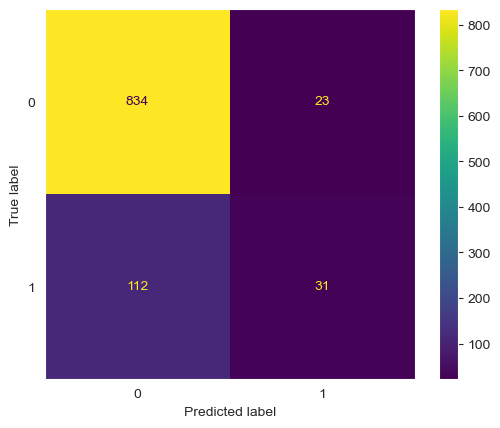

In [154]:
#confusion matrix for the baseline model
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.grid(False);

### Logistic Regression with balanced class

In [155]:
#removing class imbalance using SMOTE (OVERSAMPLING)
sm = SMOTE(random_state = 42)

#fit to the balanced x_train and y_train using sm
x_train_oversampled, y_train_oversampled = sm.fit_resample(x_train, y_train)


In [156]:
print("Original Distribution of the target training dataset")
print(y_train.value_counts())
print("\n------------------------------------------------------------------------")
print("Distribution of the target training dataset after resampling using SMOTE")
print(y_train_oversampled.value_counts())

Original Distribution of the target training dataset
churn
0    1993
1     340
Name: count, dtype: int64

------------------------------------------------------------------------
Distribution of the target training dataset after resampling using SMOTE
churn
0    1993
1    1993
Name: count, dtype: int64


In [157]:
#Fitting baseline model on the resampled datasets
baseline_model.fit(x_train_oversampled,y_train_oversampled)

#Predicting the results based on the resampled datasets 
y_pred_oversampled =baseline_model.predict(x_test)

#Evaluate the model
print ("Oversampled Model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred_oversampled)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred_oversampled)}")
print (f"recall: {metrics.recall_score(y_test, y_pred_oversampled)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred_oversampled)}")
print("\n")
print("comparing with")
print("\n")
#compare it with the previous model
print ("Baseline Model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred)}")
print (f"recall: {metrics.recall_score(y_test, y_pred)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred)}")


Oversampled Model Metrics:
Accuracy: 0.769
Precision: 0.36163522012578614
recall: 0.8041958041958042
f1_score: 0.49891540130151846


comparing with


Baseline Model Metrics:
Accuracy: 0.865
Precision: 0.5740740740740741
recall: 0.21678321678321677
f1_score: 0.3147208121827411


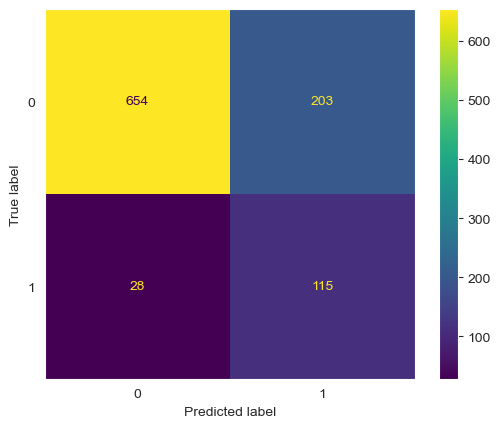

In [158]:
#confusion matrix for the balanced model
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_oversampled)

display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.grid(False);

In the scaled data, the accuracy and precision have reduced while the recall and f1_score have increased.

Plotting and calculating the AUC of the resampled datasets

AUC: 0.8347708301033856


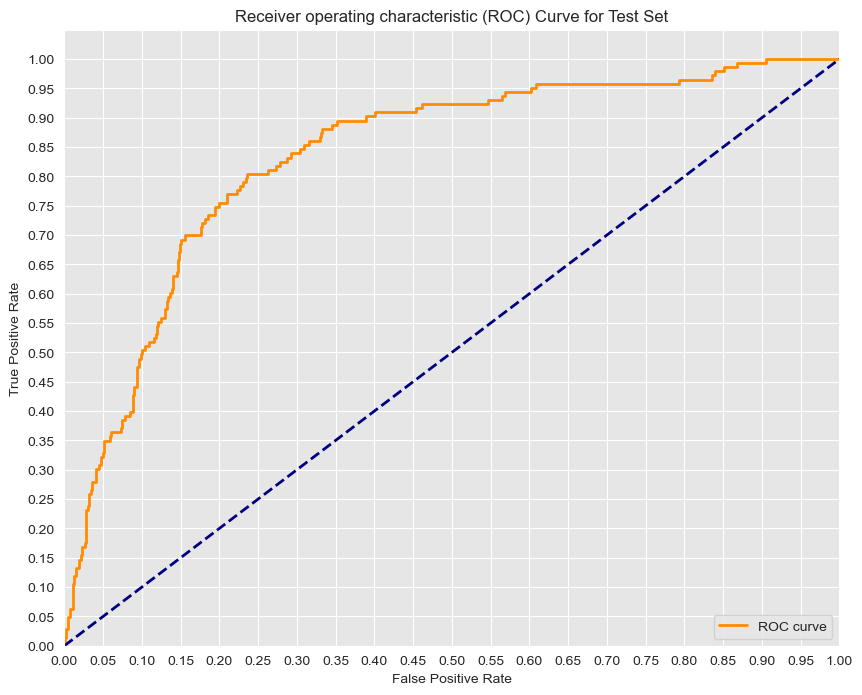

In [159]:
# Probability scores for test set
y_score_oversampled = baseline_model.fit(x_train_oversampled,y_train_oversampled).decision_function(x_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score_oversampled)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC

print('AUC: {}'.format(metrics.auc(fpr, tpr)))

# Plot the ROC curve

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')

plt.show()

There's also no big difference between the two AUC values

In [160]:
baseline_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Logistic model with increased regulaization

Reducing regularization of the model.
This is done by incrreasing the 'c' value

In [161]:
#Set the 'C' value to 1e20
model_reg = LogisticRegression(C=1e20, random_state =42)

#Fit x_train_oversampled and y_train_oversampled

model_reg.fit(x_train_oversampled, y_train_oversampled)

LogisticRegression(C=1e+20, random_state=42)

In [162]:
#Predicting results.
y_pred_model_reg = model_reg.predict(x_test)

#Evaluating using metrics of success
print ("Regularised Model:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred_model_reg)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred_model_reg)}")
print (f"recall: {metrics.recall_score(y_test, y_pred_model_reg)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred_model_reg)}")
print ("\n")
print ("Comparing with:")
print ("\n")
#Comparing with the oversampled model
print ("Oversampled Model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred_oversampled)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred_oversampled)}")
print (f"recall: {metrics.recall_score(y_test, y_pred_oversampled)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred_oversampled)}")
print ("\n")
print ("And")
print ("\n")
#comparing the baseline model with the other two models
print ("Baseline Model Metrics:")
print (f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print (f"Precision: {metrics.precision_score(y_test, y_pred)}")
print (f"recall: {metrics.recall_score(y_test, y_pred)}")
print (f"f1_score: {metrics.f1_score(y_test, y_pred)}")


Regularised Model:
Accuracy: 0.769
Precision: 0.36163522012578614
recall: 0.8041958041958042
f1_score: 0.49891540130151846


Comparing with:


Oversampled Model Metrics:
Accuracy: 0.769
Precision: 0.36163522012578614
recall: 0.8041958041958042
f1_score: 0.49891540130151846


And


Baseline Model Metrics:
Accuracy: 0.865
Precision: 0.5740740740740741
recall: 0.21678321678321677
f1_score: 0.3147208121827411


There is no difference between the regularised model and the oversampled model

The increase in the recall value shows that we are now able to identify 80.4% of the true positives.

Although now the accuracy score has reduced to 76.9% from 86.5%

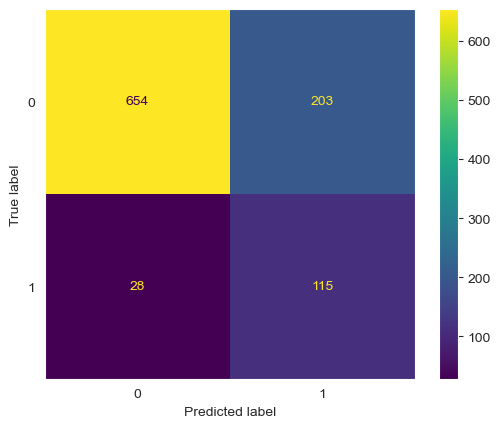

In [163]:
#confusion matrix for the pruned model
confusion_matrix = metrics.confusion_matrix(y_test,y_pred_model_reg)

display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.grid(False);

AUC: 0.8347708301033856


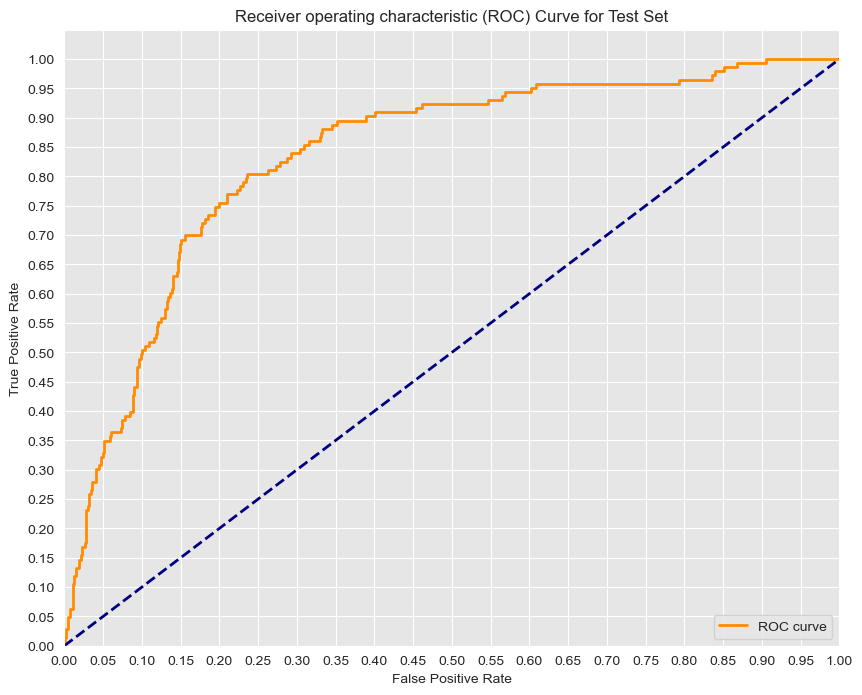

In [164]:
x_train_pred_model_reg = x_train_oversampled
y_train_pred_model_reg = y_train_oversampled
# Probability scores for test set
y_score_reg = baseline_model.fit(x_train_pred_model_reg ,y_train_pred_model_reg).decision_function(x_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score_reg)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC

print('AUC: {}'.format(metrics.auc(fpr, tpr)))

# Plot the ROC curve

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')

plt.show()

## Evaluating the models

In [165]:
#Compiling all model results and saving them as a DataFrame

summary_results= {"model":["DT_baseline_model","Pruned_model","LR_baseline_model","LR_balanced_model", "LR_reg_model"],   
                "precision":[0.7254901960784313, 0.8295454545454546,0.5740740740740741,0.36163522012578614,0.36163522012578614],
                "recall":[0.7326732673267327, 0.7227722772277227,0.21678321678321677,0.8041958041958042,0.8041958041958042],
                "accuracy":[0.9175412293853074,0.9355322338830585,0.865,0.769,0.769],
                "F1 score":[ 0.729064039408867,0.7724867724867724,0.3147208121827411, 0.49891540130151846, 0.49891540130151846],
                "AUC Score":[0.8416016513312109,0.8481352552216352,0.83050321906798,0.8347708301033856,0.8347708301033856]}



summary_df = pd.DataFrame.from_dict(summary_results)
summary_df

,model,precision,recall,accuracy,F1 score,AUC Score
0,DT_baseline_model,0.725490,0.732673,0.917541,0.729064,0.841602
1,Pruned_model,0.829545,0.722772,0.935532,0.772487,0.848135
2,LR_baseline_model,0.574074,0.216783,0.865000,0.314721,0.830503
3,LR_balanced_model,0.361635,0.804196,0.769000,0.498915,0.834771
4,LR_reg_model,0.361635,0.804196,0.769000,0.498915,0.834771


If we evaluate our models using our researched metrics of success:
- Accuracy:75% - 85% : Most of the models lied between this range, while others, especially from the deision tree models, surpassed the range.


Precision:65% - 75% : The logistic regression models did not perform well with regards to our prediction metrics. Both models from the decision trees performed well

REcall:70% - 80% : for recall, only the liner regression baseline model did not reach our predicted metrics, The other models lied between the range of our predicted metrics.

F1-Score: between 0.55 and o.75 : The Decision Tree models performed well with regards to our predicted metrics of succes, but the Logistic Regression models did not.

Area Under the Curve (AUC): All models increase their AUC but the pruned model from decision trees had the highest "AUC".

## RECOMMENDATION
1. I would recommend Decision Trees as the best Machine Learning model to use when trying to predict customer churn for SyriaTel Company.
2. The key factor influencing customer churn in SyriaTel Company is Total charges for calls, which greatly impacts the total minutes taken for calls
I would recommend that  day Call charges and international call charges to be reduced in order to reduce customer churn in SyriaTel.
3. I would also recommend strategies like rewarding minuites and tokens that can be redeemed to encourage or "entice" their customers to use Syriatel and inrease the number of calls. 


## CONCLUSION
This analysis on Syriatel was better achieved using the Decision Tree model. It helped us conclude that Syriatel company should consider reducing call charges and include incentives in order to reduce customer churn and attract more customers.

## NEXT STEPS

The model can nowbe deployed to the endusers, and it can also be use to predict future similar cases in future.

The project only used two modelling types to achieve it's goals. Other models should be considered just incase they are able to produce better results. 